The original continuous values for each marker can be found in the ADNI dataset and merged onto dataframes using RID and PET exam date. 

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [13]:
def create_gaussian_df(target, label_col):
    # Uses a label column to create a bimodal gaussian mixture model based on the training set.
    # This is then used to create boolean labels for the training, validation, and testing set
    # data. 
    
    # Replace csv names if needed. 
    
    train = pd.read_csv('csv/generated/{}_train_complete_updated_raw.csv'.format(target))
    val = pd.read_csv('csv/generated/{}_val_complete_updated_raw.csv'.format(target))
    test = pd.read_csv('csv/generated/{}_test_complete_updated_raw.csv'.format(target))

    gm = GaussianMixture(n_components=2, random_state=0).fit(train[label_col].values.reshape(-1, 1))
    
    train['{}_GAUSSIAN_CLS'.format(target)] = gm.predict(train[label_col].values.reshape(-1, 1))
    val['{}_GAUSSIAN_CLS'.format(target)] = gm.predict(val[label_col].values.reshape(-1, 1))
    test['{}_GAUSSIAN_CLS'.format(target)] = gm.predict(test[label_col].values.reshape(-1, 1))

    train.to_csv('csv/generated/{}_train_complete_updated_raw_gaussian.csv'.format(target), index=False)
    val.to_csv('csv/generated/{}_val_complete_updated_raw_gaussian.csv'.format(target), index=False)
    test.to_csv('csv/generated/{}_test_complete_updated_raw_gaussian.csv'.format(target), index=False)

In [14]:
create_gaussian_df('A', 'WCN')
create_gaussian_df('T', 'NORMALIZED_TAU')
create_gaussian_df('N', 'NORMALIZED_N')

In [16]:
def show_histograms(target, label_col):
    
    train = pd.read_csv('csv/generated/{}_train_complete_gaussian.csv'.format(target))
    raw_values = train[label_col].values
    
    plt.title('{} Histogram'.format(target))
    plt.xlabel('Biomarker Value')
    plt.ylabel('# of Subjects')
    plt.hist(raw_values, bins=10)
    plt.show()
    
    gaussian_labels = train['{}_GAUSSIAN_CLS'.format(target)]
    
    plt.plot(raw_values, gaussian_labels, '.')
    plt.title('{} Raw Values vs Gaussian Labels'.format(target))
    plt.xlabel('Biomarker Value')
    plt.ylabel('Gaussian Label')
    plt.show()

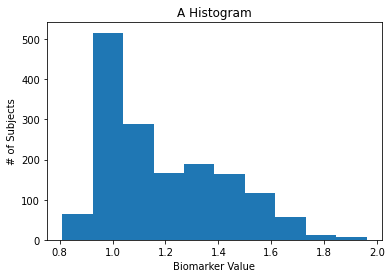

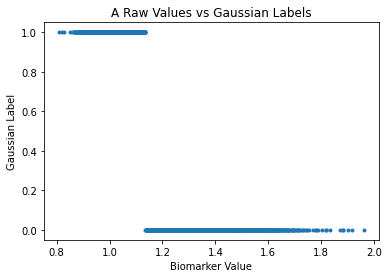

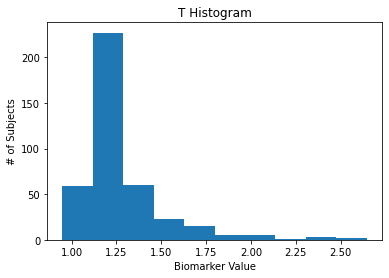

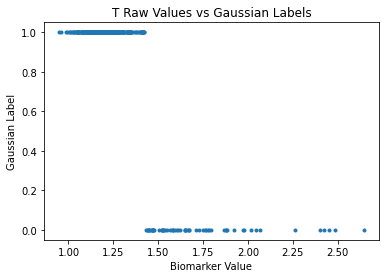

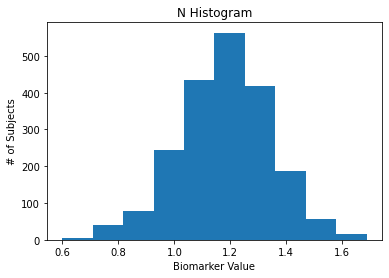

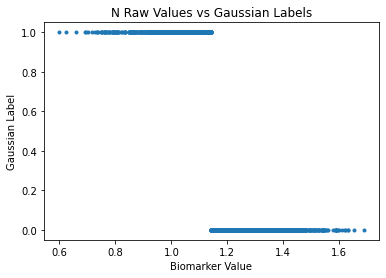

In [17]:
show_histograms('A', 'amyloid_WCN')
show_histograms('T', 'NORMALIZED_TAU')
show_histograms('N', 'NORMALIZED_N')